In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv(r'../../datasets/anemia.csv')

In [6]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Anemia dataset containing attributes Gender, Hemoglobin, MCHC, MCV, MCH and Results. This dataset is used to predict if a patient is likely to suffer from anemia. Machine learning binary classifier algorithm to be used.

1. Gender: 0 - male, 1 - female

2. Hemoglobin: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs

3. MCH: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called hemoglobin, which carries oxygen around your body.

4. MCHC: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin inside a single red blood cell.

5. MCV: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.

6. Results: 0- not anemic, 1-anemic

In [7]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [18]:
# check for missing values
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [20]:
df.shape

(1421, 6)

In [21]:
df['Gender'].value_counts()

1    740
0    681
Name: Gender, dtype: int64

In [22]:
df['Result'].value_counts()

0    801
1    620
Name: Result, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

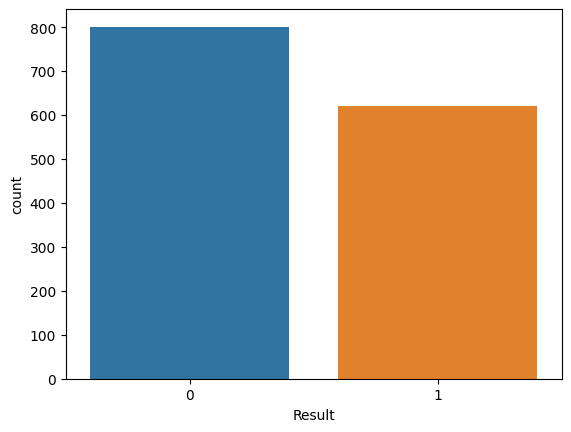

In [23]:
# Plot the distribution of the target variable
sns.countplot(x='Result', data=df)

<Axes: xlabel='Result', ylabel='Gender'>

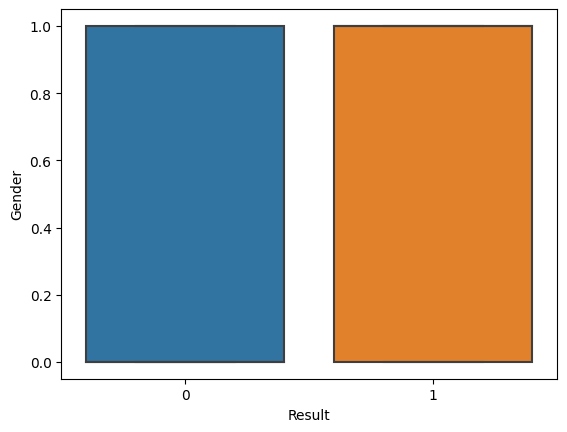

In [25]:
# checking for outliers
sns.boxplot(x='Result', y='Gender', data=df)

<Axes: xlabel='Result', ylabel='Hemoglobin'>

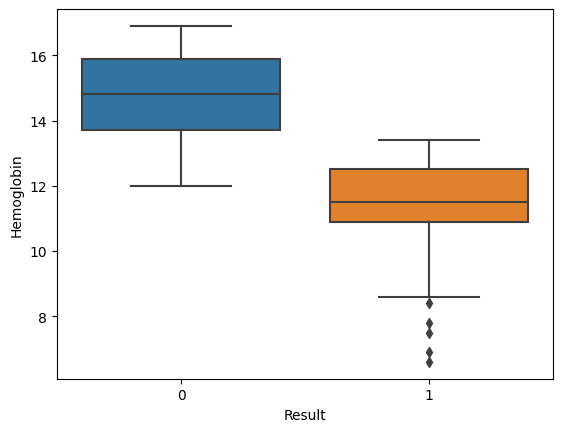

In [26]:
# checking for outliers
sns.boxplot(x='Result', y='Hemoglobin', data=df)

<Axes: xlabel='Hemoglobin', ylabel='Result'>

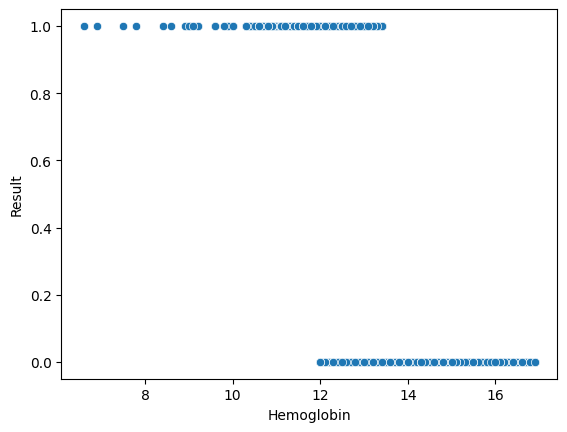

In [27]:
sns.scatterplot(x='Hemoglobin', y='Result', data=df)

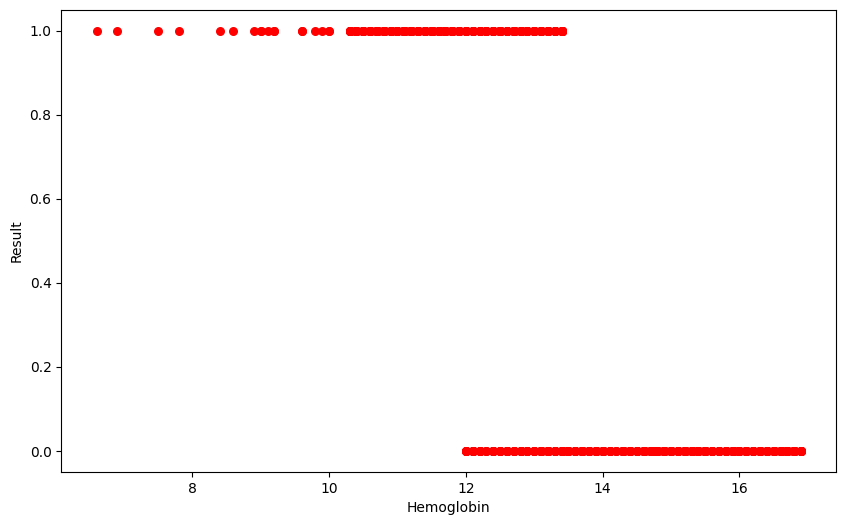

In [28]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Hemoglobin'], df['Result'], c='red', marker='o', s=30)
plt.xlabel('Hemoglobin')
plt.ylabel('Result')
plt.show()

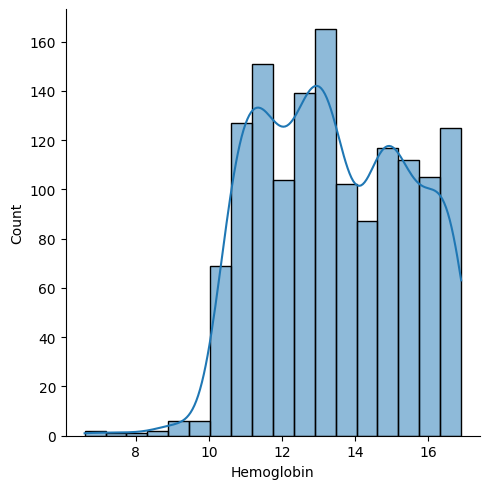

In [29]:
sns.displot(df['Hemoglobin'], kde=True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Result', axis=1)
Y = df['Result']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1136, 5), (285, 5), (1136,), (285,))

In [35]:
y_train.value_counts()

0    631
1    505
Name: Result, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [37]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [38]:
log_reg.score(x_test, y_test)

0.9894736842105263

In [1]:
import pickle

In [40]:
pickle.dump(log_reg, open('../../model/anemia.pkl', 'wb'))

In [3]:
lod_pickle = pickle.load(open('../../../model/anemia.pkl', 'rb'))

In [44]:
lod_pickle.predict(x_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [4]:
to_predict_list = [1, 12.5, 27.4, 32.4, 84.5]

In [5]:
lod_pickle.predict([to_predict_list])

c:\Users\salman\OneDrive\Desktop\SEM 6\ML\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)